<a href="https://colab.research.google.com/github/aarav2703/Bike-sharing-R/blob/main/Module_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install tidymodels package
install.packages("tidymodels")
install.packages("rlang")

# Load necessary libraries
library(tidymodels)
library(tidyverse)
library(stringr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘shape’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘Rcpp’, ‘diagram’, ‘lava’, ‘prodlim’, ‘warp’, ‘future.apply’, ‘iterators’, ‘listenv’, ‘parallelly’, ‘lhs’, ‘DiceDesign’, ‘patchwork’, ‘globals’, ‘clock’, ‘gower’, ‘ipred’, ‘timeDate’, ‘furrr’, ‘slider’, ‘doFuture’, ‘foreach’, ‘future’, ‘GPfit’, ‘modelenv’, ‘dials’, ‘ggplot2’, ‘hardhat’, ‘infer’, ‘modeldata’, ‘parsnip’, ‘recipes’, ‘rsample’, ‘rstudioapi’, ‘tune’, ‘workflows’, ‘workflowsets’, ‘yardstick’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ────────────────────────────────────── tidymodels 1.2.0 ──

✔ broom        1.0.5      ✔ recipes      1.0.10
✔ dials        1.2.1      ✔ rsample      1.2.1 
✔ dplyr        1.1.4      ✔ tibble       3.2.1 
✔ ggplot2      3.5.1      ✔ tidyr        1.3.1 
✔ infer        1.0.7      ✔ tune         1.2.1 
✔ modeldata    1.4.0      

In [ ]:
# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)

# Print the dataset structure
spec(bike_sharing_df)

# Drop DATE and FUNCTIONING_DAY columns
bike_sharing_df <- bike_sharing_df %>%
                   select(-DATE, -FUNCTIONING_DAY)


Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  DATE = col_character(),
  RENTED_BIKE_COUNT = col_double(),
  TEMPERATURE = col_double(),
  HUMIDITY = col_double(),
  WIND_SPEED = col_double(),
  VISIBILITY = col_double(),
  DEW_POINT_TEMPERATURE = col_double(),
  SOLAR_RADIATION = col_double(),
  RAINFALL = col_double(),
  SNOWFALL = col_double(),
  FUNCTIONING_DAY = col_character(),
  `0` = col_double(),
  `1` = col_double(),
  `10` = col_double(),
  `11` = col_double(),
  `12` = col_double(),
  `13` = col_double(),
  `14` = col_double(),
  `15` = col_double(),
  `16` = col_double(),
  `17` = col_double(),
  `18` = col_double(),
  `19` = col_double(),
  `2` = col_double(),
  `20` = col_double(),
  `21` = col_double(),
  `22` = col_double(),
  `23` = col_double(),
  `3` = col_double(),
  `4` = col_double(),
  `5` = col_double(),
  `6` = col_double(),
  `7` = col_double(),
  `8` = col_double(),
  `9` = col_double(),
  AUTUMN = col_double(),
  SPRING = col_double(),
  SUMMER = col_double(),
  WINTER = col_double(),
  HOLIDAY 

In [ ]:
# Load necessary libraries
library(tidymodels)
library(tidyverse)
library(stringr)

# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)

# Drop DATE and FUNCTIONING_DAY columns
bike_sharing_df <- bike_sharing_df %>%
                   select(-DATE, -FUNCTIONING_DAY)

# Set seed for reproducibility
set.seed(1234)

# Split the data
data_split <- initial_split(bike_sharing_df, prop = 3/4)

# Create training and testing datasets
train_data <- training(data_split)
test_data <- testing(data_split)

# Print the dimensions of the datasets
cat("Training data dimensions:", dim(train_data), "\n")
cat("Testing data dimensions:", dim(test_data), "\n")


Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Training data dimensions: 6348 39 
Testing data dimensions: 2117 39 


In [ ]:
# Load necessary libraries
library(tidymodels)
library(tidyverse)
library(stringr)

# Dataset URL
dataset_url <- "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-RP0321EN-SkillsNetwork/labs/datasets/seoul_bike_sharing_converted_normalized.csv"
bike_sharing_df <- read_csv(dataset_url)

# Drop DATE and FUNCTIONING_DAY columns
bike_sharing_df <- bike_sharing_df %>%
                   select(-DATE, -FUNCTIONING_DAY)

# Set seed for reproducibility
set.seed(1234)

# Split the data
data_split <- initial_split(bike_sharing_df, prop = 3/4)

# Create training and testing datasets
train_data <- training(data_split)
test_data <- testing(data_split)

# Define the linear regression model specification
lm_spec <- linear_reg() %>%
  set_engine("lm") %>%
  set_mode("regression")

# Fit the linear regression model using weather variables only
lm_model_weather <- lm_spec %>%
  fit(RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + RAINFALL + SNOWFALL,
      data = train_data)

# Print the fit summary
summary(lm_model_weather$fit)


Rows: 8465 Columns: 41
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): DATE, FUNCTIONING_DAY
dbl (39): RENTED_BIKE_COUNT, TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.



Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ TEMPERATURE + HUMIDITY + 
    WIND_SPEED + VISIBILITY + DEW_POINT_TEMPERATURE + SOLAR_RADIATION + 
    RAINFALL + SNOWFALL, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1348.46  -294.03   -57.28   208.59  2329.78 

Coefficients:
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             156.71      58.07   2.699  0.00698 ** 
TEMPERATURE            2399.74     261.66   9.171  < 2e-16 ***
HUMIDITY               -918.38     126.79  -7.243  4.9e-13 ***
WIND_SPEED              404.47      48.16   8.399  < 2e-16 ***
VISIBILITY               12.56      24.86   0.505  0.61351    
DEW_POINT_TEMPERATURE  -316.92     278.83  -1.137  0.25575    
SOLAR_RADIATION        -444.85      34.69 -12.824  < 2e-16 ***
RAINFALL              -1764.01     182.65  -9.658  < 2e-16 ***
SNOWFALL                317.78     131.58   2.415  0.01576 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [ ]:
# Fit the linear regression model using all variables
lm_model_all <- lm_spec %>%
  fit(RENTED_BIKE_COUNT ~ .,
      data = train_data)

# Print the fit summary
summary(lm_model_all$fit)



Call:
stats::lm(formula = RENTED_BIKE_COUNT ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1401.45  -218.96    -7.31   199.53  1780.67 

Coefficients: (3 not defined because of singularities)
                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)             212.20      51.04   4.158 3.26e-05 ***
TEMPERATURE             782.66     212.13   3.690 0.000227 ***
HUMIDITY               -886.73      99.49  -8.913  < 2e-16 ***
WIND_SPEED               31.91      40.27   0.792 0.428169    
VISIBILITY               21.87      20.26   1.079 0.280439    
DEW_POINT_TEMPERATURE   598.39     221.37   2.703 0.006888 ** 
SOLAR_RADIATION         276.88      41.47   6.677 2.64e-11 ***
RAINFALL              -2064.64     143.28 -14.410  < 2e-16 ***
SNOWFALL                260.97     103.50   2.522 0.011709 *  
`0`                     -29.30      34.26  -0.855 0.392515    
`1`                    -116.85      33.72  -3.465 0.000533 ***
`10`                 

In [ ]:
# Make predictions using lm_model_weather
test_results_weather <- test_data %>%
  mutate(
    pred = predict(lm_model_weather, new_data = test_data)$.pred,
    truth = RENTED_BIKE_COUNT
  )

# Make predictions using lm_model_all
test_results_all <- test_data %>%
  mutate(
    pred = predict(lm_model_all, new_data = test_data)$.pred,
    truth = RENTED_BIKE_COUNT
  )


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `pred = predict(lm_model_all, new_data = test_data)$.pred`.
Caused by warning in `predict.lm()`:
! prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


In [ ]:
# Calculate R-squared and RMSE for lm_model_weather
rsq_weather <- rsq(test_results_weather, truth = truth, estimate = pred)
rmse_weather <- rmse(test_results_weather, truth = truth, estimate = pred)

# Calculate R-squared and RMSE for lm_model_all
rsq_all <- rsq(test_results_all, truth = truth, estimate = pred)
rmse_all <- rmse(test_results_all, truth = truth, estimate = pred)

# Print the results
rsq_weather
rmse_weather
rsq_all
rmse_all


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.438866


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,474.6247


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6690204


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,364.4235


Warning message:
“Removed 3 rows containing missing values or values outside the scale range
(`geom_bar()`).”


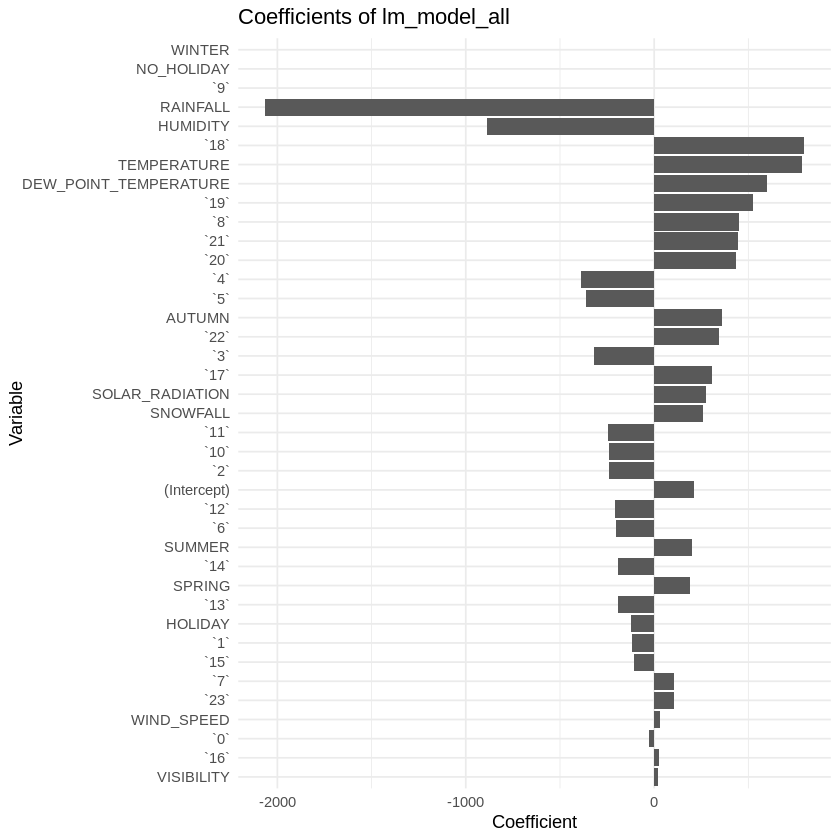

In [ ]:
# Print coefficients of lm_model_all
coefficients_all <- lm_model_all$fit$coefficients

# Create a data frame of coefficients for visualization
coefficients_df <- as.data.frame(coefficients_all) %>%
  rownames_to_column(var = "variable") %>%
  rename(coefficient = coefficients_all) %>%
  arrange(desc(abs(coefficient)))

# Visualize the coefficients using ggplot
library(ggplot2)
ggplot(coefficients_df, aes(x = reorder(variable, abs(coefficient)), y = coefficient)) +
  geom_bar(stat = "identity") +
  coord_flip() +
  labs(title = "Coefficients of lm_model_all",
       x = "Variable",
       y = "Coefficient") +
  theme_minimal()


$x
   [1]  2.5083453647  0.5375398445  0.6035298415 -0.3786518145 -1.0861554850
   [6] -0.2798199735 -0.6192384365  1.3252215839 -0.3850227749 -0.4862194336
  [11] -1.8092261347  0.6742419082 -0.0310021803  1.5906484208  1.1397011256
  [16] -1.4958678695 -0.6221109199 -0.4162580689 -1.3783850521 -0.0737097559
  [21]  0.1816465519 -0.8034622207  0.5343488668  0.2483349801 -0.7205734031
  [26]  1.5357236376  0.0745016653  1.3642297297  1.0281585849  1.6178144864
  [31]  0.7262160011  0.4920049899 -0.4374524699  0.7759547950  0.6614105120
  [36]  0.2033686763 -0.0863861955 -1.3602351788  1.2415619290 -0.0875752922
  [41] -0.5334381587 -0.6049516996  0.7542599737 -0.2683404108 -0.6240287630
  [46]  0.4235895820  0.7637402424  0.3935418172 -0.5641951943 -1.5395872489
  [51] -0.3914094017  0.4474684511  1.9445650663  0.3727194245 -1.0983442640
  [56] -0.0227069174 -0.9639596368 -1.0450524265 -0.1740244453  1.6222146128
  [61]  0.0191523163  1.0450524265 -0.8111199566  0.9421941319  0.4888876565
  [66] -0.8615387315  0.9652171817 -0.8138664070  0.8078322700  0.2082085121
  [71]  1.0601696566 -0.6952079103  0.1808437354  1.8341268901  0.8056453221
  [76]  0.6916925369  0.7786254579  0.0096744409  1.0512077141 -0.9545761944
  [81]  1.2658227184 -1.1321736480  0.5623441877 -0.8327079641  1.3722848012
  [86] -1.6477626499  0.3948221253  0.8718864593 -1.3083083443 -2.3262296785
  [91]  0.1744253530 -0.8182735457  0.4782353966  0.5257148759 -0.9112544687
  [96] -2.2358390063 -0.3086846301 -0.9226777328  0.5153153085  2.1607023861
 [101]  0.8672760057 -0.1868677376  1.8051833293 -0.1292839698 -1.1291805519
 [106] -2.0487640552 -1.3064520776 -1.0281585849 -1.7194154424 -0.7610999782
 [111]  1.4335478899 -0.2098228694 -1.6105498001  0.3482788848  0.0725219782
 [116]  0.2191161811 -0.1074131185 -0.9385075927  0.8799996793 -0.8360636567
 [121] -0.3655333786 -2.4487516878  0.0310021803 -0.2029655732 -0.6472257899
 [126] -0.5558807545  1.5768096981  0.4209994088 -0.1010607878 -0.5912576121
 [131] -0.7791602570 -0.2191161811  1.5920491516 -0.8632569295 -0.0057256315
 [136] -2.6641215497 -0.6619020054 -0.7813016860  1.7853991443 -0.0816310132
 [141] -0.1596098671 -0.0859898572 -1.8031729414  0.1780347919 -1.0348806814
 [146] -0.5828134292 -0.4106666966 -0.2475205934  0.3820477309 -0.3634234395
 [151]  0.4496517564 -0.7432846073  0.4487781776 -0.5856235123 -0.7980211390
 [156]  0.5790737928 -0.1804423709  0.7185272336  0.7802305242 -1.1595813897
 [161] -0.2183073270 -1.1143644374  1.1999693900 -0.0084897850 -0.1384477283
 [166] -0.3403182338 -1.6728317202  2.7400134351  0.1828509963  0.5443961827
 [171] -0.9348337644 -0.4973601560 -0.4033741943  0.4222941413 -0.1973255597
 [176] -1.0904389123  0.4326777487 -0.0606495496 -0.0282368838 -0.7786254579
 [181]  0.9378944090 -1.0470997813 -0.2671125791 -0.3428297706 -0.1145646882
 [186] -1.3552723129  0.0665845907  1.1991585823 -1.5056088633 -0.9997679689
 [191] -0.4309439349 -0.8444943940  1.4791548674 -0.7323980546 -0.5375398445
 [196]  0.6297961310 -0.9576946384 -0.9483669882  0.2540403336 -0.3269591228
 [201]  0.6881856906 -0.1500187244  1.2130511345  0.5655847185  0.5907873888
 [206] -0.4619183329 -0.2462993209  0.5072152717 -0.5320729255  1.8112586764
 [211]  0.2296445449 -2.1368684146  1.0769424295 -0.2687497779  1.3271243586
 [216]  1.6744338308 -0.1524151822  0.5632694498 -0.2239723375 -0.1356575628
 [221]  0.7401652209 -2.2976520531 -0.0780658433 -0.3407366738  0.3340487330
 [226] -1.1336740065  0.0519486265  0.6394553059  1.1839005664  0.6692937255
 [231]  0.3684900319  0.1652114317 -0.1376504291  0.4902230731  1.0194887013
 [236]  0.7169945788  0.0258668023  0.6516138922  0.0025666512 -0.1592099490
 [241] -0.7505914792 -1.4934546740 -1.1055909893 -0.0733138185 -0.0907468267
 [246]  0.1868677376 -1.0636393185 -0.4871084557  1.1366824046 -0.7017593754
 [251]  0.4500886744 -0.8870002517 -0.2913365310  0.6130321642  1.2579437544
 [256]  0.6135087293 -0.4942345859  0.0013820419  1.6857708231  0.3922

png 
  2

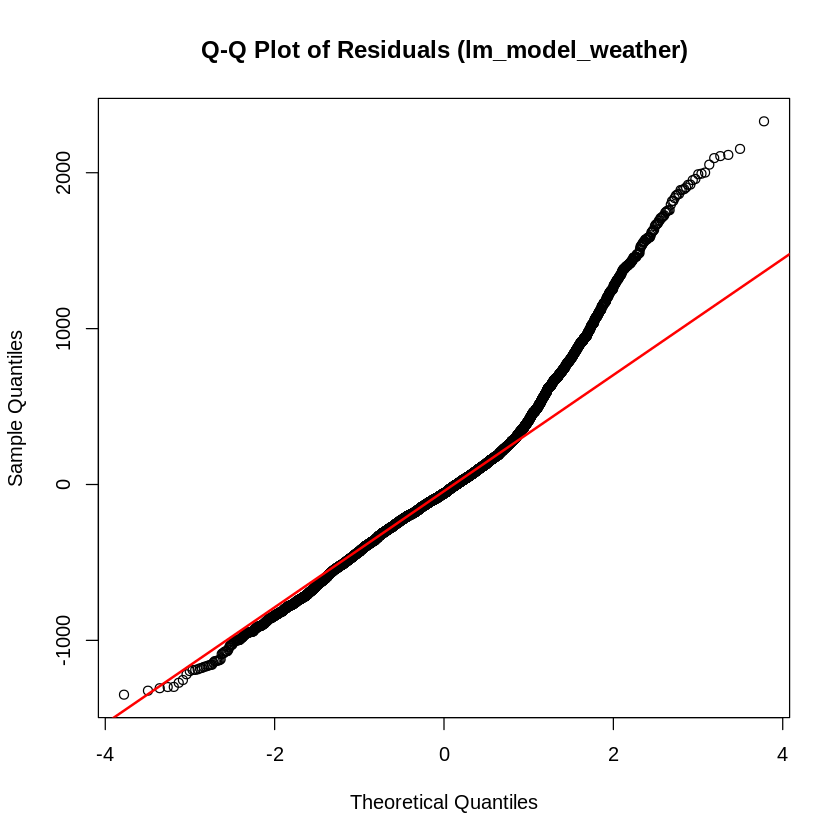

$x
   [1]  2.0175726200  0.2025625030  0.2001447706 -0.1544128986 -0.8569692524
   [6] -0.8811634413 -1.0636393185  1.2280207107  0.2017564613 -0.9978172376
  [11] -1.9393604165 -0.8846619112 -0.7391270254  1.8257004185  0.6673190385
  [16] -0.4518372071 -0.0207321064  0.8881712424 -0.2806413370 -0.2166900465
  [21]  0.8204830839 -0.2479277662 -0.6288334523  0.4627971604  0.6370349485
  [26]  2.1446783142  0.1716195842  1.4491686679 -0.2736657186  1.6570417868
  [31]  1.1202613798  1.3092381705 -0.4676371291  0.8507152743  0.9633314357
  [36] -0.3128286624  0.9900519894 -1.4721169911  0.5945528471 -0.8450585764
  [41] -0.1997419293  0.1708181850  0.6297961310 -1.0847320969 -0.1038394156
  [46]  0.2243772541  0.3841724157 -0.6178041101  0.1260991578 -1.6192777135
  [51]  0.0535303007  1.0464168424  1.9825608049 -0.6120794514 -0.2839286914
  [56]  0.2324834104  0.2296445449 -0.5790737928 -0.9342226858  1.6091070194
  [61] -1.1902912287  1.5473841687 -0.4404961228  1.2458405580 -0.0891609473
  [66] -0.6418794151 -0.7318818163 -0.2958714011  0.6916925369 -2.3382133856
  [71] -0.5384525572  0.8433668347 -0.9753330428  2.0085868185  0.5697598661
  [76] -0.1428344612  0.3173933143  0.5234492978  1.8760455657 -0.2146692421
  [81]  0.8999488948 -0.1392451155  0.1296821628 -2.0360490351  0.2114377738
  [86] -1.0512077141  0.0361383760  1.7423742758 -0.2434511097 -1.3204855186
  [91]  0.5072152717 -0.4566528234  1.3582460172 -0.8254692562  0.0385092412
  [96] -1.7700604192 -0.9971678371 -0.6609191784  0.2515941803  2.0206044209
 [101]  0.8770954744 -0.7236483279  1.3532964822  0.1692157152 -0.9601961151
 [106] -1.3009101105 -0.7775565273  0.0871789129 -1.8692056904  0.0756896172
 [111]  1.6431757976 -1.7423742758 -1.7074191612  0.0752936215  0.7866710076
 [116] -0.6589554364  0.3625799172 -2.0820862355  0.1784359831 -1.1284338568
 [121]  0.9154491391 -2.2406730817 -1.2917612936 -0.0650016924 -1.1935048659
 [126]  0.1732227138  1.9997603315 -1.6401369963 -0.2761261639  0.2720263426
 [131]  0.0420659492  1.1419720001  1.8072010398 -0.0931260749  0.7272444115
 [136] -3.1910088495 -1.2845193359 -0.5889077995  1.3214303617  0.4844425407
 [141] -0.7412042148 -0.1828509963 -1.3338222116 -1.6371132655 -1.2570731238
 [146] -0.8707321111 -0.7813016860 -0.5716186758  0.1288857972 -1.1457699326
 [151]  0.8089271939 -0.6101756899 -0.4720466240  0.6658397295 -0.5425653354
 [156] -0.6106514227  0.8684268881 -0.7287884711  0.4933424533 -0.2564880080
 [161]  0.4093782075 -0.9421941319  0.6312412447 -2.2263247241  0.2061913276
 [166] -0.5628067585 -0.5411933928  2.4332166510  0.0159928754  0.2724361179
 [171]  0.1904853826 -0.1912896407  0.3186393640  0.4839985566 -0.1540133063
 [176] -0.2312665256  0.1852606829  0.0428563994 -0.6235490873 -0.6957108075
 [181] -1.1351769213  0.2082085121  0.4693998313  0.5898473336 -0.0341628107
 [186] -1.2432706497 -0.4689590192  0.9958702959 -1.1783481360 -0.1356575628
 [191]  0.4431082189  0.0258668023  1.7194154424 -0.9715279450 -0.5334381587
 [196]  1.1665707958 -0.5931398150  0.0349530204  0.2479277662  0.4270475759
 [201] -0.6737463484 -0.3365549441  1.2032205379  0.1006639052  0.4800069765
 [206]  0.3512173020 -0.0144132167  1.3612317811  0.3693353808  2.1607023861
 [211]  0.9005410534 -1.2990716401  0.6178041101 -0.3012386568  1.3319024389
 [216]  1.2836188174  0.4025176689  1.1136300410  0.6423646895 -0.6370349485
 [221]  0.7221100121 -1.8112586764 -1.1450090246 -0.4296444244 -0.2822846329
 [226] -0.5950241216 -0.3020651553 -0.6574842962  1.3157788883  0.7032755288
 [231] -1.7334356066 -0.9721611505 -1.2081212420  1.1457699326  0.7226225940
 [236]  1.3763459417 -0.1904853826  0.2716166130  0.7083411007 -0.4782353966
 [241] -0.5338934574 -0.5398224681 -0.3298763637  0.5425653354  0.8383060246
 [246]  0.2316721157 -1.3753285291 -0.5421079079  1.2398568257  0.4924507131
 [251] -0.9627036145 -0.3579451345  0.5343488668  0.4946807997  0.3617366528
 [256]  0.0270518241  0.2646581211 -0.5517379367  1.6601667711  0.0745

png 
  2

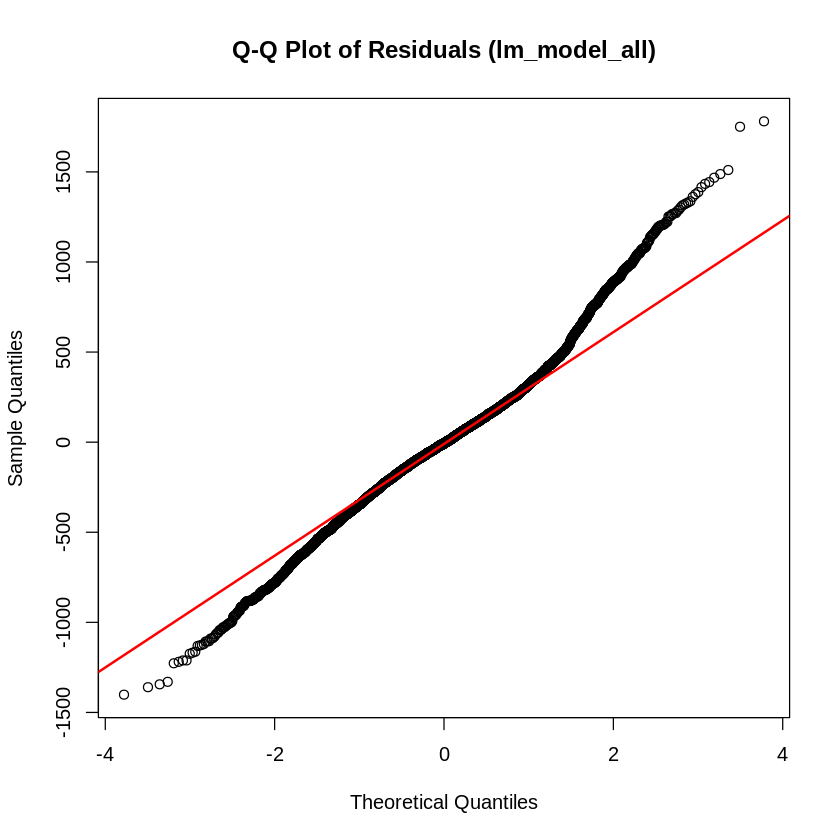

In [ ]:
# Extract residuals from lm_model_weather and lm_model_all
residuals_weather <- residuals(lm_model_weather$fit)
residuals_all <- residuals(lm_model_all$fit)

# Create Q-Q plot for lm_model_weather
qqplot_standard <- qqnorm(residuals_weather, main = "Q-Q Plot of Residuals (lm_model_weather)")
qqline(residuals_weather, col = "red", lwd = 2)

# Save Q-Q plot for lm_model_weather
png(file = "qqplot_lm_model_weather.png", width = 800, height = 600)
qqplot_standard
dev.off()

# Create Q-Q plot for lm_model_all
qqplot_all <- qqnorm(residuals_all, main = "Q-Q Plot of Residuals (lm_model_all)")
qqline(residuals_all, col = "red", lwd = 2)

# Save Q-Q plot for lm_model_all
png(file = "qqplot_lm_model_all.png", width = 800, height = 600)
qqplot_all
dev.off()


# (Optional) Hands-on Lab: Complete the Improving the Linear Model lab

In [ ]:
# Define a recipe with polynomial terms
recipe_poly <- recipe(RENTED_BIKE_COUNT ~ ., data = train_data) %>%
  step_poly(TEMPERATURE, HUMIDITY, WIND_SPEED, VISIBILITY, DEW_POINT_TEMPERATURE, SOLAR_RADIATION, RAINFALL, SNOWFALL, degree = 2)

# Define a workflow
workflow_poly <- workflow() %>%
  add_recipe(recipe_poly) %>%
  add_model(lm_spec)

# Fit the polynomial model
lm_model_poly <- workflow_poly %>%
  fit(data = train_data)

# Print the model summary
summary(lm_model_poly$fit)


        Length Class  Mode
actions 1      -none- list
fit     6      _lm    list

In [ ]:
# Define a recipe with interaction terms
recipe_interaction <- recipe(RENTED_BIKE_COUNT ~ ., data = train_data) %>%
  step_interact(~ TEMPERATURE:WIND_SPEED + HUMIDITY:VISIBILITY)

# Define a workflow
workflow_interaction <- workflow() %>%
  add_recipe(recipe_interaction) %>%
  add_model(lm_spec)

# Fit the interaction model
lm_model_interaction <- workflow_interaction %>%
  fit(data = train_data)

# Print the model summary
summary(lm_model_interaction$fit)


        Length Class  Mode
actions 1      -none- list
fit     6      _lm    list

In [ ]:
# Install glmnet package
install.packages("glmnet")

# Load glmnet package
library(glmnet)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘RcppEigen’


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [ ]:
# Define a recipe for the model
recipe_reg <- recipe(RENTED_BIKE_COUNT ~ ., data = train_data)

# Define a workflow for ridge regression
workflow_ridge <- workflow() %>%
  add_recipe(recipe_reg) %>%
  add_model(ridge_spec)

# Fit the ridge regression model
lm_model_ridge <- workflow_ridge %>%
  fit(data = train_data)

# Print the model summary
summary(lm_model_ridge$fit)

# Define a workflow for lasso regression
workflow_lasso <- workflow() %>%
  add_recipe(recipe_reg) %>%
  add_model(lasso_spec)

# Fit the lasso regression model
lm_model_lasso <- workflow_lasso %>%
  fit(data = train_data)

# Print the model summary
summary(lm_model_lasso$fit)


        Length Class  Mode
actions 1      -none- list
fit     6      _elnet list

        Length Class  Mode
actions 1      -none- list
fit     6      _elnet list

In [ ]:
# Make predictions and calculate metrics for polynomial model
test_results_poly <- test_data %>%
  mutate(
    pred = predict(lm_model_poly, new_data = test_data)$.pred,
    truth = RENTED_BIKE_COUNT
  )
rsq_poly <- rsq(test_results_poly, truth = truth, estimate = pred)
rmse_poly <- rmse(test_results_poly, truth = truth, estimate = pred)

# Make predictions and calculate metrics for interaction model
test_results_interaction <- test_data %>%
  mutate(
    pred = predict(lm_model_interaction, new_data = test_data)$.pred,
    truth = RENTED_BIKE_COUNT
  )
rsq_interaction <- rsq(test_results_interaction, truth = truth, estimate = pred)
rmse_interaction <- rmse(test_results_interaction, truth = truth, estimate = pred)

# Make predictions and calculate metrics for ridge regression model
test_results_ridge <- test_data %>%
  mutate(
    pred = predict(lm_model_ridge, new_data = test_data)$.pred,
    truth = RENTED_BIKE_COUNT
  )
rsq_ridge <- rsq(test_results_ridge, truth = truth, estimate = pred)
rmse_ridge <- rmse(test_results_ridge, truth = truth, estimate = pred)

# Make predictions and calculate metrics for lasso regression model
test_results_lasso <- test_data %>%
  mutate(
    pred = predict(lm_model_lasso, new_data = test_data)$.pred,
    truth = RENTED_BIKE_COUNT
  )
rsq_lasso <- rsq(test_results_lasso, truth = truth, estimate = pred)
rmse_lasso <- rmse(test_results_lasso, truth = truth, estimate = pred)

# Print the results
rsq_poly
rmse_poly
rsq_interaction
rmse_interaction
rsq_ridge
rmse_ridge
rsq_lasso
rmse_lasso


Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `pred = predict(lm_model_poly, new_data = test_data)$.pred`.
Caused by warning in `predict.lm()`:
! prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”
Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `pred = predict(lm_model_interaction, new_data =
  test_data)$.pred`.
Caused by warning in `predict.lm()`:
! prediction from rank-deficient fit; consider predict(., rankdeficient="NA")”


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6893042


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,353.0864


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6728003


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,362.3421


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6676019


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,365.6884


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rsq,standard,0.6685976


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,364.6602
